In [133]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import math
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [134]:
d = pd.read_csv(r'C:\Users\natal\Documents\3. Semester\HIWI\DLC 2.NL\dlc analysis nl\2.NL_left-NG-2020-03-05\200221_DSC010574_NL2DLC_resnet50_2.NL_leftMar5shuffle1_603000.csv', names=['bodyparts_coords', 'leftear_x', 'leftear_y', 'leftear_likelihood', 'rightear_x', 'rightear_y', 'rightear_likelihood', 'nose_x', 'nose_y', 'nose_likelihood', 'tailbase_x', 'tailbase_y', 'tailbase_likelihood', 'object1_x', 'object1_y', 'object1_likelihood', 'object2_x', 'object2_y', 'object2_likelihood','upperleft_x', 'upperleft_y', 'upperleft_likelihood', 'upperright_x', 'upperright_y', 'upperright_likelihood', 'lowerleft_x', 'lowerleft_y', 'lowerleft_likelihood', 'lowerright_x', 'lowerright_y', 'lowerright_likelihood'], skiprows=11)
framerate=25
d['time in s']=d['bodyparts_coords'] / framerate
d = d.iloc[:9011]
d

,bodyparts_coords,leftear_x,leftear_y,leftear_likelihood,rightear_x,rightear_y,rightear_likelihood,nose_x,nose_y,nose_likelihood,...,upperright_x,upperright_y,upperright_likelihood,lowerleft_x,lowerleft_y,lowerleft_likelihood,lowerright_x,lowerright_y,lowerright_likelihood,time in s
0,8,653.530273,84.979759,1.000000,650.248962,69.991631,1.000000,631.991821,82.375084,1.0,...,732.925720,51.769196,1.0,338.006805,445.924896,0.999994,707.739136,439.545532,0.999720,0.32
1,9,647.878845,84.554634,1.000000,646.208069,70.054787,1.000000,626.436462,80.998756,1.0,...,732.148621,52.709061,1.0,338.491547,446.351013,0.999994,707.916382,439.536407,0.998481,0.36
2,10,641.377075,87.068542,1.000000,640.483398,71.415543,1.000000,618.996155,81.118202,1.0,...,731.392456,52.222694,1.0,338.511902,446.277679,0.999994,707.435242,439.637268,0.999014,0.40
3,11,633.780334,85.956734,1.000000,634.660706,70.037811,1.000000,613.059082,78.630592,1.0,...,731.203308,53.128510,1.0,338.388916,446.571503,0.999993,707.540649,439.586151,0.999444,0.44
4,12,629.298035,83.793724,1.000000,629.990051,67.939781,1.000000,605.794067,78.024399,1.0,...,732.263977,53.492947,1.0,338.241577,446.916595,0.999993,707.794373,439.757843,0.999190,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,9014,669.190308,139.545090,1.000000,679.918457,129.951584,1.000000,656.375061,121.341797,1.0,...,723.132874,54.033161,1.0,337.780243,435.059540,0.999991,705.891113,435.520020,0.999992,360.56
9007,9015,668.043457,135.900452,1.000000,678.524414,127.906898,1.000000,655.702942,120.257561,1.0,...,723.687988,54.535870,1.0,337.713959,434.773407,0.999989,705.694641,435.516357,0.999990,360.60
9008,9016,667.827942,133.447540,0.999999,678.398682,127.484947,0.999999,653.916382,119.606422,1.0,...,723.946289,53.887753,1.0,338.142975,434.875305,0.999990,706.018127,435.782440,0.999988,360.64
9009,9017,667.618347,131.642181,0.999993,677.575317,127.128288,0.999999,650.165100,120.832657,1.0,...,724.000549,54.641747,1.0,337.653381,434.459198,0.999988,705.925659,435.650909,0.999989,360.68


In [135]:
#corners
upleft_x = d.loc[:,"upperleft_x"].median() 
upleft_y = d.loc[:,"upperleft_y"].median() 
upright_x = d.loc[:,"upperright_x"].median()
upright_y = d.loc[:,"upperright_y"].median()
lowleft_x = d.loc[:,"lowerleft_x"].median()
lowleft_y = d.loc[:,"lowerleft_y"].median()
lowright_x = d.loc[:,"lowerright_x"].median()
lowright_y = d.loc[:,"lowerright_y"].median()

#objects
object1_x = d.loc[:,"object1_x"].median()
object1_y = d.loc[:,"object1_y"].median()
object2_x = d.loc[:,"object2_x"].median()
object2_y = d.loc[:,"object2_y"].median()

In [136]:
# centroid of head
d['nose_x'] = d['nose_x'].astype(float)
d['leftear_x'] = d['leftear_x'].astype(float)
d['rightear_x'] = d['rightear_x'].astype(float)
d['nose_y'] = d['nose_y'].astype(float)
d['leftear_y'] = d['leftear_y'].astype(float)
d['rightear_y'] = d['rightear_y'].astype(float)

centroid_y= d[['nose_y', 'leftear_y', 'rightear_y']]
centroid_x= d[['nose_x', 'leftear_x', 'rightear_x']]

centroid_y['centroid_y'] = centroid_y.mean(axis=1)
centroid_x['centroid_x'] = centroid_x.mean(axis=1)
centroid = centroid_x['centroid_x'], centroid_y['centroid_y']
centroid = pd.DataFrame(centroid)
centroid = centroid.T
centroid

C:\Users\natal\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\natal\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,centroid_x,centroid_y
0,645.257019,79.115491
1,640.174459,78.536059
2,633.618876,79.867429
3,627.166707,78.208379
4,621.694051,76.585968
...,...,...
9006,668.494609,130.279490
9007,667.423604,128.021637
9008,666.714335,126.846303
9009,665.119588,126.534376


In [137]:
#change in position 
centroid['old_position_x'] = centroid['centroid_x'].shift(1)
centroid['old_position_y'] = centroid['centroid_y'].shift(1)

centroid['change_in_distance_x'] = abs(centroid['centroid_x'] - centroid['old_position_x'])
centroid['change_in_distance_y'] = abs(centroid['centroid_y'] - centroid['old_position_y'])

#pixel to cm
px = (((centroid_x_max - centroid_x_min) + (centroid_y_max - centroid_y_min)) / 2 ) / 45

centroid_x_max = centroid['centroid_x'].max()
centroid_x_min = centroid['centroid_x'].min()
centroid_y_max = centroid['centroid_y'].max()
centroid_y_min = centroid['centroid_y'].min()

centroid['object1_x'] = d['object1_x']
centroid['object1_y'] = d['object1_y']
centroid['object2_x'] = d['object2_x']
centroid['object2_y'] = d['object2_y']

#body center
centroid['bodycenter_x'] = abs((centroid['centroid_x'] + d['tailbase_x']) / 2)
centroid['bodycenter_y'] = abs((centroid['centroid_y'] + d['tailbase_y']) / 2)
centroid = centroid / px
centroid

,centroid_x,centroid_y,old_position_x,old_position_y,change_in_distance_x,change_in_distance_y,object1_x,object1_y,object2_x,object2_y,bodycenter_x,bodycenter_y
0,69.903091,8.570875,NaN,NaN,NaN,NaN,68.529797,15.049533,56.434560,35.088474,73.207187,8.096757
1,69.352478,8.508103,69.903091,8.570875,0.550613,0.062772,68.513683,15.039942,56.427888,35.098326,72.611501,8.019279
2,68.642288,8.652335,69.352478,8.508103,0.710191,0.144232,68.488299,15.059192,56.422737,35.096643,71.951598,8.024711
3,67.943300,8.472604,68.642288,8.652335,0.698987,0.179731,68.489324,15.096782,56.418228,35.093704,71.360499,7.889198
4,67.350427,8.296843,67.943300,8.472604,0.592873,0.175762,68.493324,15.055375,56.429812,35.076218,70.635981,7.762154
...,...,...,...,...,...,...,...,...,...,...,...,...
9006,72.420505,14.113661,72.853053,14.194200,0.432548,0.080539,68.669201,15.129472,56.426037,35.176819,73.580522,17.356984
9007,72.304480,13.869060,72.420505,14.113661,0.116026,0.244602,68.652830,15.100794,56.429673,35.148624,73.596905,17.075675
9008,72.227642,13.741731,72.304480,13.869060,0.076838,0.127328,68.673427,15.103987,56.453676,35.200123,73.566676,16.946394
9009,72.054877,13.707939,72.227642,13.741731,0.172765,0.033792,68.679444,15.113760,56.423531,35.184092,73.573545,16.816109


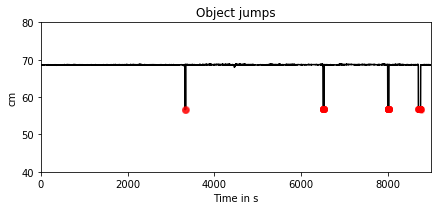

In [138]:
#detect jumps on labels of object1_x

def get_median_filtered(signal, threshold=100):
    signal = signal.copy()
    difference = np.abs(signal - np.median(signal))
    median_difference = np.median(difference)
    if median_difference == 0:
        s = 0
    else:
        s = difference / float(median_difference)
    mask = s > threshold
    signal[mask] = np.median(signal)
    return signal

figsize = (7, 2.75)
kw = dict(marker='o', linestyle='none', color='r', alpha=0.3)

centroid['object1_x1'] = get_median_filtered(centroid['object1_x'].values, threshold=30)

outlier_idx_1x = np.where(centroid['object1_x1'].values != centroid['object1_x'].values)[0]

fig, ax = plt.subplots(figsize=figsize)
centroid['object1_x'].plot(color = 'black')
centroid['object1_x'][outlier_idx_1x].plot(**kw)
plt.xlabel('Time in s')
plt.ylabel('cm')
plt.title('Object jumps')
_ = ax.set_ylim(40, 80)

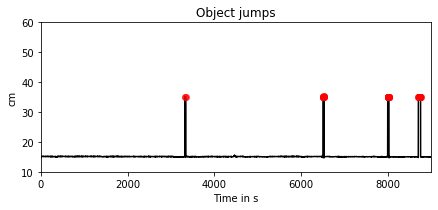

In [139]:
#detect jumps on labels of object1_y

figsize = (7, 2.75)
kw = dict(marker='o', linestyle='none', color='r', alpha=0.3)

centroid['object1_y1'] = get_median_filtered(centroid['object1_y'].values, threshold=60)

outlier_idx_1y = np.where(centroid['object1_y1'].values != centroid['object1_y'].values)[0]

fig, ax = plt.subplots(figsize=figsize)
centroid['object1_y'].plot(color = 'black')
centroid['object1_y'][outlier_idx_1y].plot(**kw)
plt.xlabel('Time in s')
plt.ylabel('cm')
plt.title('Object jumps')
_ = ax.set_ylim(10, 60)

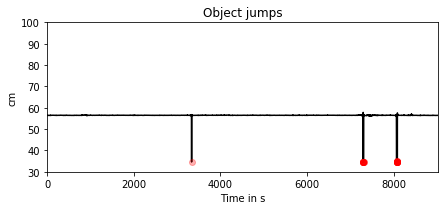

In [140]:
figsize = (7, 2.75)
kw = dict(marker='o', linestyle='none', color='r', alpha=0.3)

centroid['object2_x2'] = get_median_filtered(centroid['object2_x'].values, threshold=80)

outlier_idx_2x = np.where(centroid['object2_x2'].values != centroid['object2_x'].values)[0]

fig, ax = plt.subplots(figsize=figsize)
centroid['object2_x'].plot(color = 'black')
centroid['object2_x'][outlier_idx_2x].plot(**kw)
plt.xlabel('Time in s')
plt.ylabel('cm')
plt.title('Object jumps')
_ = ax.set_ylim(30, 100)

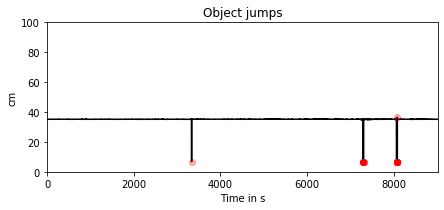

In [141]:
figsize = (7, 2.75)
kw = dict(marker='o', linestyle='none', color='r', alpha=0.3)

centroid['object2_y2'] = get_median_filtered(centroid['object2_y'].values, threshold=60)

outlier_idx_2y = np.where(centroid['object2_y2'].values != centroid['object2_y'].values)[0]

fig, ax = plt.subplots(figsize=figsize)
centroid['object2_y'].plot(color = 'black')
centroid['object2_y'][outlier_idx_2y].plot(**kw)
plt.xlabel('Time in s')
plt.ylabel('cm')
plt.title('Object jumps')
_ = ax.set_ylim(0, 100)

In [142]:
#remove jumps in object
centroid.loc[centroid.index.isin(outlier_idx_1x), 'object1_x'] = np.nan
centroid.loc[centroid.index.isin(outlier_idx_1y), 'object1_y'] = np.nan
centroid.loc[centroid.index.isin(outlier_idx_2x), 'object2_x'] = np.nan
centroid.loc[centroid.index.isin(outlier_idx_2y), 'object2_y'] = np.nan

centroid = centroid.interpolate(method = 'linear')
centroid

,centroid_x,centroid_y,old_position_x,old_position_y,change_in_distance_x,change_in_distance_y,object1_x,object1_y,object2_x,object2_y,bodycenter_x,bodycenter_y,object1_x1,object1_y1,object2_x2,object2_y2
0,69.903091,8.570875,NaN,NaN,NaN,NaN,68.529797,15.049533,56.434560,35.088474,73.207187,8.096757,68.529797,15.049533,56.434560,35.088474
1,69.352478,8.508103,69.903091,8.570875,0.550613,0.062772,68.513683,15.039942,56.427888,35.098326,72.611501,8.019279,68.513683,15.039942,56.427888,35.098326
2,68.642288,8.652335,69.352478,8.508103,0.710191,0.144232,68.488299,15.059192,56.422737,35.096643,71.951598,8.024711,68.488299,15.059192,56.422737,35.096643
3,67.943300,8.472604,68.642288,8.652335,0.698987,0.179731,68.489324,15.096782,56.418228,35.093704,71.360499,7.889198,68.489324,15.096782,56.418228,35.093704
4,67.350427,8.296843,67.943300,8.472604,0.592873,0.175762,68.493324,15.055375,56.429812,35.076218,70.635981,7.762154,68.493324,15.055375,56.429812,35.076218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,72.420505,14.113661,72.853053,14.194200,0.432548,0.080539,68.669201,15.129472,56.426037,35.176819,73.580522,17.356984,68.669201,15.129472,56.426037,35.176819
9007,72.304480,13.869060,72.420505,14.113661,0.116026,0.244602,68.652830,15.100794,56.429673,35.148624,73.596905,17.075675,68.652830,15.100794,56.429673,35.148624
9008,72.227642,13.741731,72.304480,13.869060,0.076838,0.127328,68.673427,15.103987,56.453676,35.200123,73.566676,16.946394,68.673427,15.103987,56.453676,35.200123
9009,72.054877,13.707939,72.227642,13.741731,0.172765,0.033792,68.679444,15.113760,56.423531,35.184092,73.573545,16.816109,68.679444,15.113760,56.423531,35.184092


In [143]:
del centroid['object1_x1']
del centroid['object1_y1']
del centroid['object2_x2']
del centroid['object2_y2']

centroid

,centroid_x,centroid_y,old_position_x,old_position_y,change_in_distance_x,change_in_distance_y,object1_x,object1_y,object2_x,object2_y,bodycenter_x,bodycenter_y
0,69.903091,8.570875,NaN,NaN,NaN,NaN,68.529797,15.049533,56.434560,35.088474,73.207187,8.096757
1,69.352478,8.508103,69.903091,8.570875,0.550613,0.062772,68.513683,15.039942,56.427888,35.098326,72.611501,8.019279
2,68.642288,8.652335,69.352478,8.508103,0.710191,0.144232,68.488299,15.059192,56.422737,35.096643,71.951598,8.024711
3,67.943300,8.472604,68.642288,8.652335,0.698987,0.179731,68.489324,15.096782,56.418228,35.093704,71.360499,7.889198
4,67.350427,8.296843,67.943300,8.472604,0.592873,0.175762,68.493324,15.055375,56.429812,35.076218,70.635981,7.762154
...,...,...,...,...,...,...,...,...,...,...,...,...
9006,72.420505,14.113661,72.853053,14.194200,0.432548,0.080539,68.669201,15.129472,56.426037,35.176819,73.580522,17.356984
9007,72.304480,13.869060,72.420505,14.113661,0.116026,0.244602,68.652830,15.100794,56.429673,35.148624,73.596905,17.075675
9008,72.227642,13.741731,72.304480,13.869060,0.076838,0.127328,68.673427,15.103987,56.453676,35.200123,73.566676,16.946394
9009,72.054877,13.707939,72.227642,13.741731,0.172765,0.033792,68.679444,15.113760,56.423531,35.184092,73.573545,16.816109


In [144]:
#distance of centroid to objects
centroid['cm_distance1'] = np.sqrt(((centroid['centroid_x'] - centroid['object1_x'])**2) + ((centroid['centroid_y'] - centroid['object1_y'])**2))
centroid['cm_distance2'] = np.sqrt(((centroid['centroid_x'] - centroid['object2_x'])**2) + ((centroid['centroid_y'] - centroid['object2_y'])**2))

#filter rows with jumps
df_filtered = centroid[(centroid["change_in_distance_x"] > 1)]
df_filtered = centroid[(centroid["change_in_distance_y"] > 1)]
df_filtered

#insert NAN in rows with jumps
c = centroid.replace(centroid[(centroid["change_in_distance_x"] > 1)], np.NAN)
b = centroid.replace(centroid[(centroid["change_in_distance_y"] > 1)], np.NAN)
centroid = c.interpolate(method = 'linear')
centroid = b.interpolate(method = 'linear')
centroid

,centroid_x,centroid_y,old_position_x,old_position_y,change_in_distance_x,change_in_distance_y,object1_x,object1_y,object2_x,object2_y,bodycenter_x,bodycenter_y,cm_distance1,cm_distance2
0,69.903091,8.570875,NaN,NaN,NaN,NaN,68.529797,15.049533,56.434560,35.088474,73.207187,8.096757,6.622608,29.741963
1,69.352478,8.508103,69.903091,8.570875,0.550613,0.062772,68.513683,15.039942,56.427888,35.098326,72.611501,8.019279,6.585476,29.564928
2,68.642288,8.652335,69.352478,8.508103,0.710191,0.144232,68.488299,15.059192,56.422737,35.096643,71.951598,8.024711,6.408706,29.131063
3,67.943300,8.472604,68.642288,8.652335,0.698987,0.179731,68.489324,15.096782,56.418228,35.093704,71.360499,7.889198,6.646643,29.008796
4,67.350427,8.296843,67.943300,8.472604,0.592873,0.175762,68.493324,15.055375,56.429812,35.076218,70.635981,7.762154,6.854486,28.920490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,72.420505,14.113661,72.853053,14.194200,0.432548,0.080539,68.669201,15.129472,56.426037,35.176819,73.580522,17.356984,3.886406,26.447677
9007,72.304480,13.869060,72.420505,14.113661,0.116026,0.244602,68.652830,15.100794,56.429673,35.148624,73.596905,17.075675,3.853792,26.548622
9008,72.227642,13.741731,72.304480,13.869060,0.076838,0.127328,68.673427,15.103987,56.453676,35.200123,73.566676,16.946394,3.806335,26.632322
9009,72.054877,13.707939,72.227642,13.741731,0.172765,0.033792,68.679444,15.113760,56.423531,35.184092,73.573545,16.816109,3.656485,26.562457


In [145]:
#distance from body center to objects
centroid['body_distance1'] = np.sqrt(((centroid['bodycenter_x'] - centroid['object1_x'])**2) + ((centroid['bodycenter_y'] - centroid['object1_y'])**2))
centroid['body_distance2'] = np.sqrt(((centroid['bodycenter_x'] - centroid['object2_x'])**2) + ((centroid['bodycenter_y'] - centroid['object2_y'])**2))


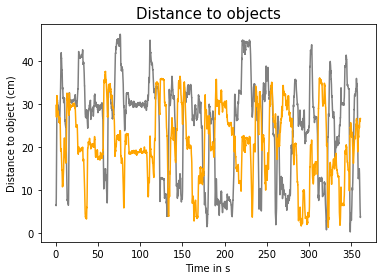

In [146]:
plt.plot(d['time in s'], centroid['cm_distance1'], color='grey')
plt.plot(d['time in s'], centroid['cm_distance2'], color='orange')
plt.xlabel('Time in s')
plt.ylabel('Distance to object (cm)')
plt.title('Distance to objects', fontsize = 15)
plt.show()

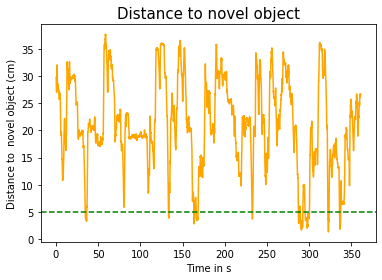

In [147]:
#plot with 5cm threshold visualized
plt.plot(d['time in s'], centroid['cm_distance2'], color='orange')
plt.axhline(y = 5, color='green', linestyle='--', linewidth=1.5)
plt.xlabel('Time in s')
plt.ylabel('Distance to  novel object (cm)')
plt.title('Distance to novel object', fontsize = 15)
plt.show()

In [148]:
#time near object1
time1 = centroid[centroid["cm_distance1"] < 5].count()["cm_distance1"]

#time near object2
time2 = centroid[centroid["cm_distance2"] < 5].count()["cm_distance2"]
centroid['time_at_object1'] = time1 / framerate
centroid['time_at_object2'] = time2 / framerate


#time at object using centroid + extracting time body center is close to center of object, within 2 cm of object center) (mouse sitting on object)

time11 = centroid[(centroid["cm_distance1"] < 5) & (centroid["body_distance1"] > 2)].count()["body_distance1"]
time22 = centroid[(centroid["cm_distance2"] < 5) & (centroid["body_distance2"] > 2)].count()["body_distance2"]

centroid['time_at_object11'] = time11 / framerate
centroid['time_at_object22'] = time22 / framerate
centroid

,centroid_x,centroid_y,old_position_x,old_position_y,change_in_distance_x,change_in_distance_y,object1_x,object1_y,object2_x,object2_y,bodycenter_x,bodycenter_y,cm_distance1,cm_distance2,body_distance1,body_distance2,time_at_object1,time_at_object2,time_at_object11,time_at_object22
0,69.903091,8.570875,NaN,NaN,NaN,NaN,68.529797,15.049533,56.434560,35.088474,73.207187,8.096757,6.622608,29.741963,8.379681,31.778511,9.4,19.04,6.24,18.0
1,69.352478,8.508103,69.903091,8.570875,0.550613,0.062772,68.513683,15.039942,56.427888,35.098326,72.611501,8.019279,6.585476,29.564928,8.129073,31.546539,9.4,19.04,6.24,18.0
2,68.642288,8.652335,69.352478,8.508103,0.710191,0.144232,68.488299,15.059192,56.422737,35.096643,71.951598,8.024711,6.408706,29.131063,7.840814,31.209534,9.4,19.04,6.24,18.0
3,67.943300,8.472604,68.642288,8.652335,0.698987,0.179731,68.489324,15.096782,56.418228,35.093704,71.360499,7.889198,6.646643,29.008796,7.758409,31.037987,9.4,19.04,6.24,18.0
4,67.350427,8.296843,67.943300,8.472604,0.592873,0.175762,68.493324,15.055375,56.429812,35.076218,70.635981,7.762154,6.854486,28.920490,7.601451,30.787552,9.4,19.04,6.24,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,72.420505,14.113661,72.853053,14.194200,0.432548,0.080539,68.669201,15.129472,56.426037,35.176819,73.580522,17.356984,3.886406,26.447677,5.392854,24.735053,9.4,19.04,6.24,18.0
9007,72.304480,13.869060,72.420505,14.113661,0.116026,0.244602,68.652830,15.100794,56.429673,35.148624,73.596905,17.075675,3.853792,26.548622,5.323912,24.926800,9.4,19.04,6.24,18.0
9008,72.227642,13.741731,72.304480,13.869060,0.076838,0.127328,68.673427,15.103987,56.453676,35.200123,73.566676,16.946394,3.806335,26.632322,5.228609,25.021059,9.4,19.04,6.24,18.0
9009,72.054877,13.707939,72.227642,13.741731,0.172765,0.033792,68.679444,15.113760,56.423531,35.184092,73.573545,16.816109,3.656485,26.562457,5.181720,25.129779,9.4,19.04,6.24,18.0


In [149]:
list = centroid['cm_distance1'].to_list()

In [150]:
#visits
#get rows close to object 1
object1 = centroid[~(centroid['cm_distance1'] > 5)]  

# get indices
r =[]
for i in object1.index: 
    r.append(i)
#print(r, end = " ") 

index=np.array(r)
len(index)

#get number of jumps
count = []
prev = index[0]
for a in index[1:]:
    if prev+1 != a+1:
        count.append(a)
    prev = a+1
    #print(count)
    
visits1= len(count)
visits1


#get rows close to object 2
object2 = centroid[~(centroid['cm_distance2'] > 5)]  

# get indices
r2 =[]
for i in object2.index: 
    r2.append(i)
#print(r2, end = " ") 

index2=np.array(r2)
len(index2)

#get number of jumps
count2 = []
prev2 = index2[0]
for b in index2[1:]:
    if prev2+1 != b+1:
        count2.append(b)
    prev2 = b+1
    #print(count2)
    
visits2= len(count2)
visits2

10

In [151]:
centroid['visit1']=visits1
centroid['visit2']=visits2
centroid

,centroid_x,centroid_y,old_position_x,old_position_y,change_in_distance_x,change_in_distance_y,object1_x,object1_y,object2_x,object2_y,...,cm_distance1,cm_distance2,body_distance1,body_distance2,time_at_object1,time_at_object2,time_at_object11,time_at_object22,visit1,visit2
0,69.903091,8.570875,NaN,NaN,NaN,NaN,68.529797,15.049533,56.434560,35.088474,...,6.622608,29.741963,8.379681,31.778511,9.4,19.04,6.24,18.0,10,10
1,69.352478,8.508103,69.903091,8.570875,0.550613,0.062772,68.513683,15.039942,56.427888,35.098326,...,6.585476,29.564928,8.129073,31.546539,9.4,19.04,6.24,18.0,10,10
2,68.642288,8.652335,69.352478,8.508103,0.710191,0.144232,68.488299,15.059192,56.422737,35.096643,...,6.408706,29.131063,7.840814,31.209534,9.4,19.04,6.24,18.0,10,10
3,67.943300,8.472604,68.642288,8.652335,0.698987,0.179731,68.489324,15.096782,56.418228,35.093704,...,6.646643,29.008796,7.758409,31.037987,9.4,19.04,6.24,18.0,10,10
4,67.350427,8.296843,67.943300,8.472604,0.592873,0.175762,68.493324,15.055375,56.429812,35.076218,...,6.854486,28.920490,7.601451,30.787552,9.4,19.04,6.24,18.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,72.420505,14.113661,72.853053,14.194200,0.432548,0.080539,68.669201,15.129472,56.426037,35.176819,...,3.886406,26.447677,5.392854,24.735053,9.4,19.04,6.24,18.0,10,10
9007,72.304480,13.869060,72.420505,14.113661,0.116026,0.244602,68.652830,15.100794,56.429673,35.148624,...,3.853792,26.548622,5.323912,24.926800,9.4,19.04,6.24,18.0,10,10
9008,72.227642,13.741731,72.304480,13.869060,0.076838,0.127328,68.673427,15.103987,56.453676,35.200123,...,3.806335,26.632322,5.228609,25.021059,9.4,19.04,6.24,18.0,10,10
9009,72.054877,13.707939,72.227642,13.741731,0.172765,0.033792,68.679444,15.113760,56.423531,35.184092,...,3.656485,26.562457,5.181720,25.129779,9.4,19.04,6.24,18.0,10,10


In [152]:
from math import acos, degrees

centroid['middle_x'] = abs((d['leftear_x']+d['rightear_x']) / 2)
centroid['middle_y'] = abs((d['leftear_y']+d['rightear_y']) /2)
centroid['object11_x'] = centroid['object1_x'] * px
centroid['object11_y'] = centroid['object1_y'] * px
centroid['object22_x'] = centroid['object2_x'] * px
centroid['object22_y'] = centroid['object2_y'] * px
centroid['nose_x'] = d['nose_x']
centroid['nose_y'] = d['nose_y']
centroid.head(10)

,centroid_x,centroid_y,old_position_x,old_position_y,change_in_distance_x,change_in_distance_y,object1_x,object1_y,object2_x,object2_y,...,visit1,visit2,middle_x,middle_y,object11_x,object11_y,object22_x,object22_y,nose_x,nose_y
0,69.903091,8.570875,NaN,NaN,NaN,NaN,68.529797,15.049533,56.434560,35.088474,...,10,10,651.889618,77.485695,632.580505,138.918274,520.932556,323.892456,631.991821,82.375084
1,69.352478,8.508103,69.903091,8.570875,0.550613,0.062772,68.513683,15.039942,56.427888,35.098326,...,10,10,647.043457,77.304710,632.431763,138.829742,520.870972,323.983398,626.436462,80.998756
2,68.642288,8.652335,69.352478,8.508103,0.710191,0.144232,68.488299,15.059192,56.422737,35.096643,...,10,10,640.930237,79.242043,632.197449,139.007431,520.823425,323.967865,618.996155,81.118202
3,67.943300,8.472604,68.642288,8.652335,0.698987,0.179731,68.489324,15.096782,56.418228,35.093704,...,10,10,634.220520,77.997272,632.206909,139.354416,520.781799,323.940735,613.059082,78.630592
4,67.350427,8.296843,67.943300,8.472604,0.592873,0.175762,68.493324,15.055375,56.429812,35.076218,...,10,10,629.644043,75.866753,632.243835,138.972198,520.888733,323.779327,605.794067,78.024399
5,66.139892,8.243578,67.350427,8.296843,1.210535,0.053265,68.571143,15.041309,56.447149,35.092603,...,10,10,617.845337,75.729328,632.962158,138.842361,521.048767,323.930573,595.869080,76.824226
6,65.218244,8.237234,66.139892,8.243578,0.921648,0.006344,68.620655,14.964692,56.406240,35.049921,...,10,10,609.354797,75.074402,633.419189,138.135132,520.671143,323.536591,587.327698,77.958397
7,64.266540,8.168411,65.218244,8.237234,0.951704,0.068822,68.642442,15.030756,56.459217,35.074423,...,10,10,600.504822,74.955975,633.620300,138.744949,521.160156,323.762756,578.672852,76.289406
8,63.109732,8.041333,64.266540,8.168411,1.156807,0.127078,68.666623,15.107186,56.455851,35.082473,...,10,10,589.831940,74.388359,633.843506,139.450455,521.129089,323.837067,567.984070,73.905571
9,61.793140,7.920258,63.109732,8.041333,1.316592,0.121076,68.666431,15.122163,56.431069,35.069050,...,10,10,578.141632,73.138222,633.841736,139.588699,520.900330,323.713165,554.905334,73.052994


In [153]:
#angles for object 1
angles=[]
for i in range(centroid.shape[0]):
    p0 = [centroid.nose_x[i],centroid.nose_y[i]] 
    p1 = [centroid.middle_x[i],centroid.middle_y[i]] 
    p2 = [centroid.object11_x[i],centroid.object11_y[i]] 

    v0 = np.array(p0) - np.array(p1) 
    v1 = np.array(p2) - np.array(p1) 
    
    angle = abs(degrees(np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))))
    angles.append(round(angle,2))
centroid['Angles1']=angles

In [154]:
#angles for object 2
angles2=[]
for i in range(centroid.shape[0]):
    p0 = [centroid.nose_x[i],centroid.nose_y[i]] 
    p1 = [centroid.middle_x[i],centroid.middle_y[i]] 
    p2 = [centroid.object22_x[i],centroid.object22_y[i]] 

    v0 = np.array(p0) - np.array(p1) 
    v1 = np.array(p2) - np.array(p1) 
    
    angle2 = abs(degrees(np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))))
    angles2.append(round(angle2,2))
centroid['Angles2']=angles2

del centroid['nose_x']
del centroid['nose_y']
del centroid['middle_x']
del centroid['middle_y']
del centroid['object22_y']
del centroid['object22_x']
del centroid['object11_y']
del centroid['object11_x']
centroid

,centroid_x,centroid_y,old_position_x,old_position_y,change_in_distance_x,change_in_distance_y,object1_x,object1_y,object2_x,object2_y,...,body_distance1,body_distance2,time_at_object1,time_at_object2,time_at_object11,time_at_object22,visit1,visit2,Angles1,Angles2
0,69.903091,8.570875,NaN,NaN,NaN,NaN,68.529797,15.049533,56.434560,35.088474,...,8.379681,31.778511,9.4,19.04,6.24,18.0,10,10,58.75,48.21
1,69.352478,8.508103,69.903091,8.570875,0.550613,0.062772,68.513683,15.039942,56.427888,35.098326,...,8.129073,31.546539,9.4,19.04,6.24,18.0,10,10,66.48,52.75
2,68.642288,8.652335,69.352478,8.508103,0.710191,0.144232,68.488299,15.059192,56.422737,35.096643,...,7.840814,31.209534,9.4,19.04,6.24,18.0,10,10,76.80,58.97
3,67.943300,8.472604,68.642288,8.652335,0.698987,0.179731,68.489324,15.096782,56.418228,35.093704,...,7.758409,31.037987,9.4,19.04,6.24,18.0,10,10,86.41,63.52
4,67.350427,8.296843,67.943300,8.472604,0.592873,0.175762,68.493324,15.055375,56.429812,35.076218,...,7.601451,30.787552,9.4,19.04,6.24,18.0,10,10,87.19,61.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,72.420505,14.113661,72.853053,14.194200,0.432548,0.080539,68.669201,15.129472,56.426037,35.176819,...,5.392854,24.735053,9.4,19.04,6.24,18.0,10,10,43.29,87.43
9007,72.304480,13.869060,72.420505,14.113661,0.116026,0.244602,68.652830,15.100794,56.429673,35.148624,...,5.323912,24.926800,9.4,19.04,6.24,18.0,10,10,44.24,85.16
9008,72.227642,13.741731,72.304480,13.869060,0.076838,0.127328,68.673427,15.103987,56.453676,35.200123,...,5.228609,25.021059,9.4,19.04,6.24,18.0,10,10,42.36,81.48
9009,72.054877,13.707939,72.227642,13.741731,0.172765,0.033792,68.679444,15.113760,56.423531,35.184092,...,5.181720,25.129779,9.4,19.04,6.24,18.0,10,10,35.56,73.03


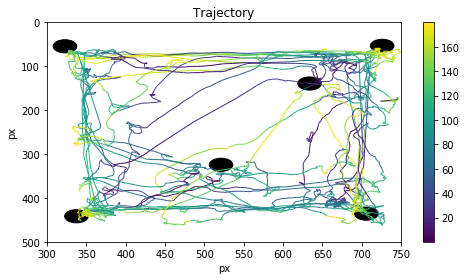

In [155]:
x = centroid['centroid_x'] * px
y = centroid['centroid_y'] * px
v = centroid['Angles1']

#Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(7,4))

#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
corner1 = plt.Circle((upright_x,upright_y), 15, color='black')
corner2 = plt.Circle((upleft_x,upleft_y), 15, color='black')
corner3 = plt.Circle((lowleft_x,lowleft_y), 15, color='black')
corner4 = plt.Circle((lowright_x,lowright_y), 15, color='black')
object1 = plt.Circle((object1_x,object1_y), 15, color='black')
object2 = plt.Circle((object2_x,object2_y), 15, color='black')
ax.add_artist(corner1)
ax.add_artist(corner2)
ax.add_artist(corner3)
ax.add_artist(corner4)
ax.add_artist(object1)
ax.add_artist(object2)
plt.gca().invert_yaxis()

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(v.min(), v.max())
#norm = plt.Normalize(v.min(), 10)
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(v)
lc.set_linewidth(1)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

# Setting lim here is important, otherwise can't show fig properly
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.xlim(300,750)
plt.ylim(0,500)

plt.xlabel('px')
plt.ylabel('px')
plt.title('Trajectory')

plt.gca().invert_yaxis() # Just to align the plot with real camera settings
#plt.title(str(Path(video).stem)+' '+bpt+' trajectory with velocity')
plt.tight_layout()
plt.show()